#### (week 5) Miscellaneous Selected Problems for Quantitative Modeling 
#### Muhammad Kevin Alrahmanto (19/445592/PA/19416, Universitas Gadjah Mada)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.  Monte Carlo Simulation

## 1.1  Projected Sales

In [21]:
import calendar

In [4]:
# Note : this symbol(	) will appear when the data are copied from excel spreadsheet!
historical_sales_2022=pd.DataFrame({'Month': [calendar.month_name[i] for i in range (1, 13)],
                              'Sales':list(map(int,'60	56	60	52	38	53	47	57	47	54	43	41'.split()))}).set_index('Month')

historical_sales_2022.T

Month,January,February,March,April,May,June,July,August,September,October,November,December
Sales,60,56,60,52,38,53,47,57,47,54,43,41


In [5]:
np.round(historical_sales_2022.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Sales,12.0,50.67,7.39,38.0,46.0,52.5,56.25,60.0


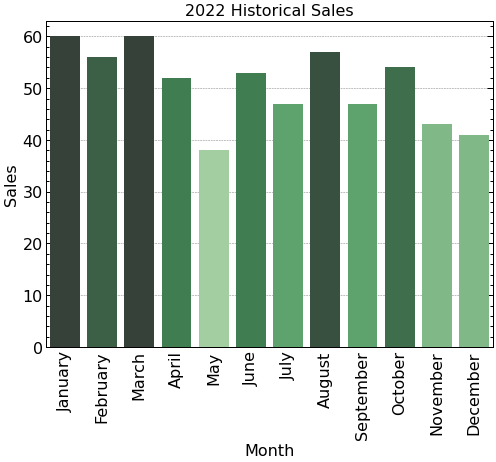

In [6]:
def colors_from_values(values, palette_name):
    """ 
    https://stackoverflow.com/a/60917129/19495671
    """
    normalized = (values - min(values)) / (max(values) - min(values))
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

sns.barplot( x=historical_sales_2022.index, y=historical_sales_2022['Sales'], palette=colors_from_values(historical_sales_2022['Sales'], "Greens_d"))
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.xticks(rotation=90)
plt.title('2022 Historical Sales')
plt.show()

### 1.1.1  Projected sales INVESTIGATION using monte carlo simulation with random UNIFORM distribution

In [7]:
def uniform_mc_sales(min_val, max_val, trial):
    simulation_data=pd.DataFrame([list(map(int, np.random.uniform(min_val, max_val, trial))) for i in range(12)], 
                                 index=[calendar.month_name[i] for i in range (1, 13)],
                                 columns=['simulation_'+str(i) for i in range(1,trial+1)])
    simulation_data['mean']=simulation_data.mean(axis=1)
    return simulation_data

In [8]:
min_val=historical_sales_2022['Sales'].min()
max_val=historical_sales_2022['Sales'].max()
trial=10
data_u10=uniform_mc_sales(min_val=min_val, max_val=max_val, trial=trial)
data_u10

,simulation_1,simulation_2,simulation_3,simulation_4,simulation_5,simulation_6,simulation_7,simulation_8,simulation_9,simulation_10,mean
January,52,47,56,54,45,52,46,50,56,39,49.7
February,42,57,44,39,47,54,58,50,53,40,48.4
March,39,57,52,47,58,43,47,57,56,46,50.2
April,46,51,46,54,44,56,39,47,58,43,48.4
May,56,56,53,39,50,39,51,45,47,39,47.5
June,49,55,53,38,46,40,50,53,47,46,47.7
July,42,42,45,55,46,49,38,59,51,42,46.9
August,50,43,50,50,41,39,57,43,42,43,45.8
September,56,55,53,47,42,47,46,56,41,53,49.6
October,51,53,55,50,41,53,41,38,41,44,46.7


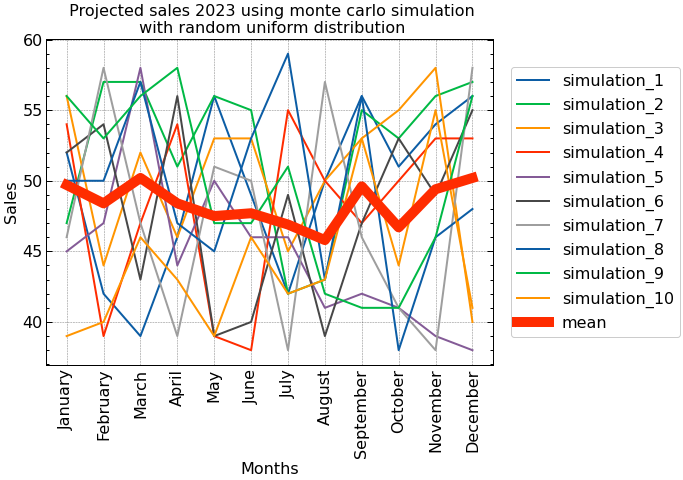

In [9]:
data_u10.iloc[:, :-1].plot()
plt.plot(data_u10['mean'], lw=10, label='mean')

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.xticks(np.arange(len(data_u10.index)), data_u10.index)
plt.xticks(rotation=90)

plt.xlabel('Months')
plt.ylabel('Sales')
plt.title(' Projected sales 2023 using monte carlo simulation\n with random uniform distribution')

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

### 1.1.2  Projected sales INVESTIGATION using monte carlo simulation with random NORMAL distribution

In [10]:
def normal_mc_sales(mu, sigma, trial):
    simulation_data=pd.DataFrame([list(map(int, np.random.normal(mu, sigma, trial))) for i in range(12)], 
                                 index=[calendar.month_name[i] for i in range (1, 13)],
                                 columns=['simulation_'+str(i) for i in range(1,trial+1)])
    simulation_data['mean']=simulation_data.mean(axis=1)
    simulation_data['worst_scenario']=simulation_data.min(axis=1)
    simulation_data['best_scenario']=simulation_data.max(axis=1)
    return simulation_data

In [11]:
mu=historical_sales_2022['Sales'].mean()
sigma=historical_sales_2022['Sales'].std(ddof=1)
trial=100
data_n100=normal_mc_sales(mu, sigma, trial)
data_n100.iloc[:, -10:]

,simulation_94,simulation_95,simulation_96,simulation_97,simulation_98,simulation_99,simulation_100,mean,worst_scenario,best_scenario
January,45,56,44,60,64,48,50,50.01,35.0,64.0
February,51,49,56,56,53,44,49,50.40,30.0,65.0
March,43,39,56,58,37,62,43,51.90,33.0,71.0
April,58,58,34,55,47,54,40,48.99,33.0,70.0
May,43,50,61,45,53,44,63,50.72,31.0,70.0
June,61,41,51,50,50,50,50,49.59,29.0,67.0
July,56,69,56,46,47,43,50,51.11,33.0,74.0
August,44,55,54,44,62,59,62,51.66,35.0,68.0
September,48,53,48,47,50,39,42,49.13,34.0,72.0
October,39,47,50,58,46,57,64,52.24,33.0,69.0


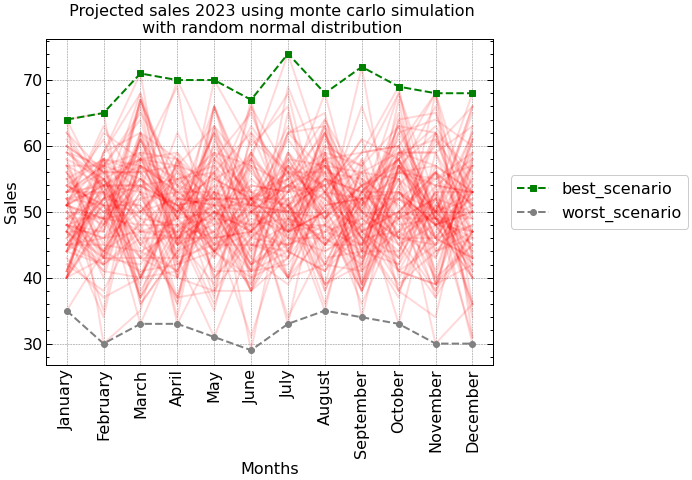

In [12]:
plt.plot(data_n100.iloc[:, :-3], label= '_nolegend_', color='red', alpha=0.15)
plt.plot(data_n100['best_scenario'],  linestyle='--', marker='s', color='g', label='best_scenario')
plt.plot(data_n100['worst_scenario'],  linestyle='--', marker='o', color='gray' ,label='worst_scenario')

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.xticks(np.arange(len(data_n100.index)), data_n100.index)
plt.xticks(rotation=90)

plt.xlabel('Months')
plt.ylabel('Sales')
plt.title(' Projected sales 2023 using monte carlo simulation\n with random normal distribution')

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

## 1.2 Annual Cashflow

In [13]:
fixed_expenses=60000
variable_expenses=30
unit_price=129
mean_sales=625
std_sales=72
trial=1000

In [14]:
sales_simulation=np.array(list(map(int, np.random.normal(mean_sales,std_sales, trial))))
earnings=sales_simulation*unit_price - sales_simulation*variable_expenses - fixed_expenses
final_result=pd.DataFrame({'Mean':[earnings.mean()],
                          'Lowest_Earning':[earnings.min()],
                          'Highest_Earning':[earnings.max()],
                          '95%_Empirical_rule_loss':[earnings.mean()- 2*earnings.std(ddof=1)]}, index=['Value'])
np.round(final_result.T,1)

,Value
Mean,1601.9
Lowest_Earning,-23766.0
Highest_Earning,24150.0
95%_Empirical_rule_loss,-12798.7


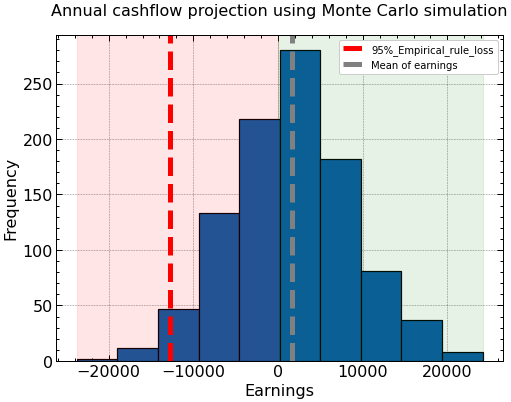

In [15]:
plt.hist(earnings, edgecolor='black', linewidth=1.2)
plt.xlabel('Earnings')
plt.ylabel('Frequency')
plt.title('Annual cashflow projection using Monte Carlo simulation', pad=20)

plt.axvline(earnings.mean()- 2*earnings.std(ddof=1), color='red', linewidth=5, ls='--', label="95%_Empirical_rule_loss")
plt.axvline(earnings.mean(), color='gray', linewidth=5, ls='--', label="Mean of earnings")
plt.axvspan(earnings.min(), 0, alpha=0.1, color='red')
plt.axvspan(0,earnings.max(), alpha=0.1, color='green')

plt.legend(fontsize=10, title_fontsize=15)
plt.show()

# 2. Fitting Growth

### 2.1  Customer Growth

In [16]:
cust_growth=pd.DataFrame({'Month': [calendar.month_name[i] for i in range (1, 13)],
                          'Period':[num for num in range(1, 13)],
                          'Sales':list(map(int,'30	32	38	45	55	69	87	110	140	179	232	303'.split()))}).set_index('Month')

cust_growth['%change']=np.round(cust_growth['Sales'].pct_change(),4)*100
cust_growth.T

Month,January,February,March,April,May,June,July,August,September,October,November,December
Period,1.0,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.0
Sales,30.0,32.00,38.00,45.00,55.00,69.00,87.00,110.00,140.00,179.00,232.00,303.0
%change,NaN,6.67,18.75,18.42,22.22,25.45,26.09,26.44,27.27,27.86,29.61,30.6


Define the exponential model:
$$
C_f=C_be^{rt}
$$
where:
$$
C_f=\;\mathrm{customers}\;\mathrm{at}\;\mathrm{final}\;\mathrm{period}\;\;\\C_b=\;\mathrm{customers}\;\mathrm{at}\;\mathrm{base}\;\mathrm{period}\;\;\;\\r=\;\mathrm{growth}\;\mathrm{rate}\;\mathrm{per}\;\mathrm{period}\;\;\;\\t=\;\mathrm{number}\;\mathrm{of}\;\mathrm{periods}\;\mathrm{after}\;\mathrm{base}
$$


In [17]:
def customers(t, C_b, r):
    C_f = C_b*np.exp(r*t)
    return C_f

In [18]:
from scipy.optimize import curve_fit
parameters, covariance = curve_fit(customers, cust_growth['Period'], cust_growth['Sales'])
print(f'C_b = {parameters[0]}\n r = {parameters[1]}')

C_b = 16.24562887992457
 r = 0.2423282051200046


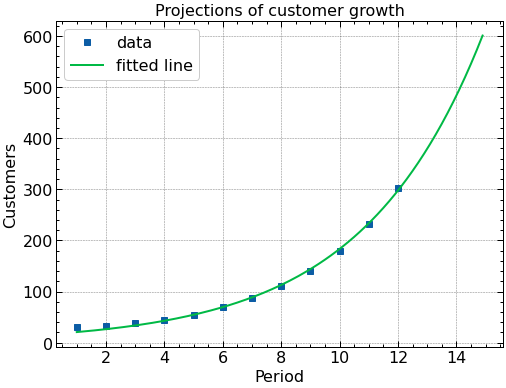

In [22]:
fit_customer = customers(np.arange(1, 15, 0.1), parameters[0], parameters[1])
plt.plot(cust_growth['Period'], cust_growth['Sales'], 's', label='data')
plt.plot(np.arange(1, 15, 0.1), fit_customer, '-', label='fitted line')
plt.xlabel('Period')
plt.ylabel('Customers')
plt.title('Projections of customer growth')
plt.legend()
plt.show()